In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
df=pd.read_csv(r'C:\Users\acer\learn_data_science2\time-series-analysis\time-series-analysis\XAU_USD Historical Data.csv')

In [3]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/10/2025,"4,195.63","4,211.00","4,218.84","4,188.07",NaN,-0.33%
1,12/09/2025,"4,209.54","4,189.00","4,221.67","4,170.00",NaN,0.49%
2,12/08/2025,"4,189.05","4,197.19","4,219.31","4,176.34",NaN,-0.19%
3,12/05/2025,"4,197.13","4,208.69","4,259.55","4,191.95",NaN,-0.27%
4,12/04/2025,"4,208.69","4,206.15","4,219.46","4,174.60",NaN,0.06%


In [4]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602 entries, 0 to 2601
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2602 non-null   object
 1   Price     2602 non-null   object
 2   Open      2602 non-null   object
 3   High      2602 non-null   object
 4   Low       2602 non-null   object
 5   Vol.      14 non-null     object
 6   Change %  2602 non-null   object
dtypes: object(7)
memory usage: 142.4+ KB


In [6]:
df['Price'] = df['Price'].astype(str).str.replace(',', '')
df['Price'] = df['Price'].astype(float)

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
data = df[['Date', 'Price']].rename(columns={
    'Date': 'ds',
    'Price': 'y'
})

In [9]:
model = Prophet(daily_seasonality=True)
model.fit(data)

19:01:39 - cmdstanpy - INFO - Chain [1] start processing
19:01:41 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future = model.make_future_dataframe(periods=365)   # 30 days prediction
forecast = model.predict(future)

In [11]:
result = forecast[(forecast['ds'] >= '2025-12-10') & 
                  (forecast['ds'] <= '2025-12-29')]

In [12]:
final_output = result[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print(final_output)

             ds         yhat   yhat_lower   yhat_upper
2601 2025-12-10  3828.266149  3715.759941  3938.171760
2602 2025-12-11  3827.349495  3721.352859  3934.927025
2603 2025-12-12  3827.528806  3717.857273  3931.839250
2604 2025-12-13  3817.362157  3709.481250  3923.578758
2605 2025-12-14  3817.676420  3703.343123  3923.444091
2606 2025-12-15  3827.599238  3719.125203  3934.079255
2607 2025-12-16  3828.374377  3724.768489  3934.297878
2608 2025-12-17  3830.875210  3728.876223  3936.576185
2609 2025-12-18  3831.666312  3714.660030  3938.020272
2610 2025-12-19  3833.715542  3728.136334  3936.214513
2611 2025-12-20  3825.541684  3717.258436  3938.783649
2612 2025-12-21  3827.930351  3720.134762  3937.777424
2613 2025-12-22  3839.967011  3733.680218  3952.334711
2614 2025-12-23  3842.853404  3744.926327  3949.921208
2615 2025-12-24  3847.422062  3745.759329  3960.837442
2616 2025-12-25  3850.198885  3741.307078  3954.154195
2617 2025-12-26  3854.116121  3743.236975  3961.397972
2618 2025-

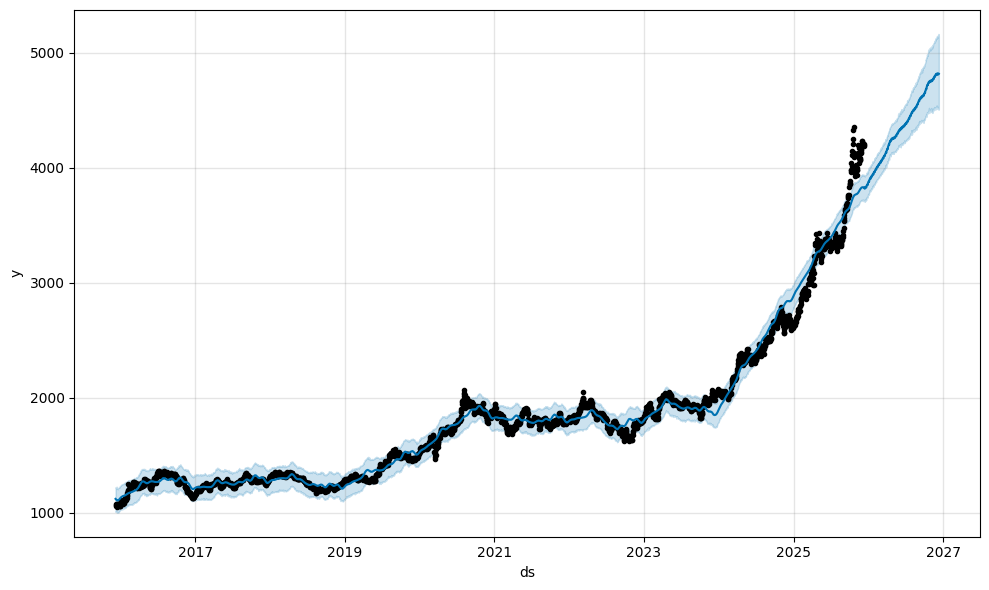

In [13]:
model.plot(forecast)
plt.show()

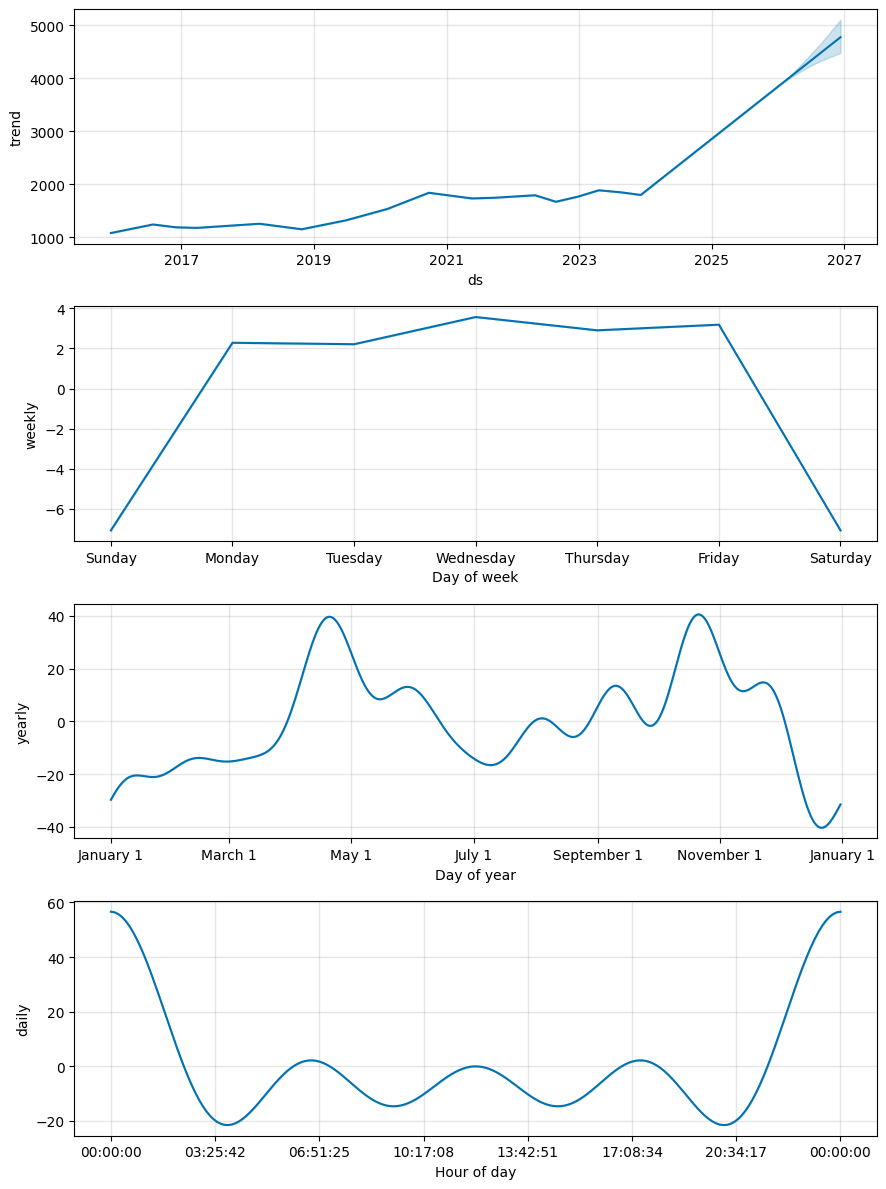

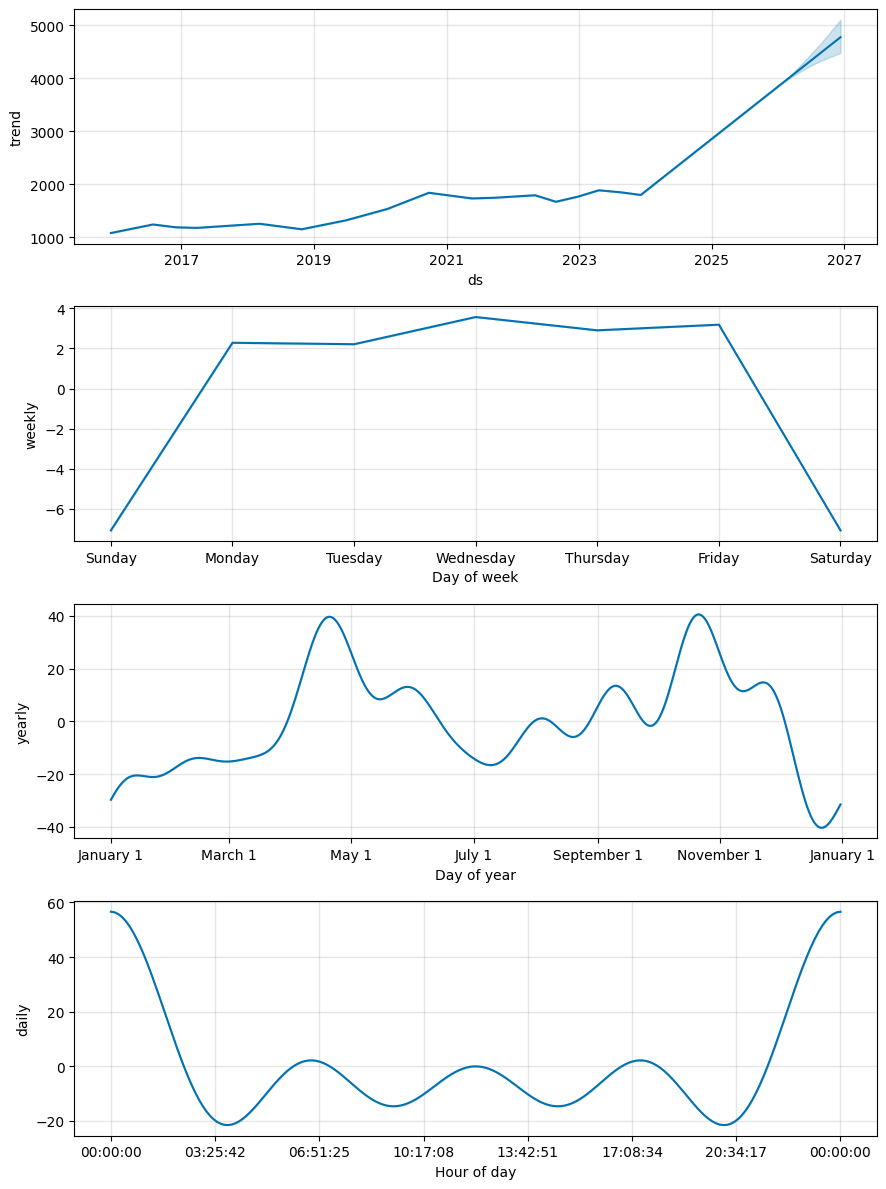

In [14]:
model.plot_components(forecast)

In [15]:
df.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,2025-12-10,4195.63,"4,211.00","4,218.84","4,188.07",NaN,-0.33%
1,2025-12-09,4209.54,"4,189.00","4,221.67","4,170.00",NaN,0.49%
2,2025-12-08,4189.05,"4,197.19","4,219.31","4,176.34",NaN,-0.19%
3,2025-12-05,4197.13,"4,208.69","4,259.55","4,191.95",NaN,-0.27%
4,2025-12-04,4208.69,"4,206.15","4,219.46","4,174.60",NaN,0.06%


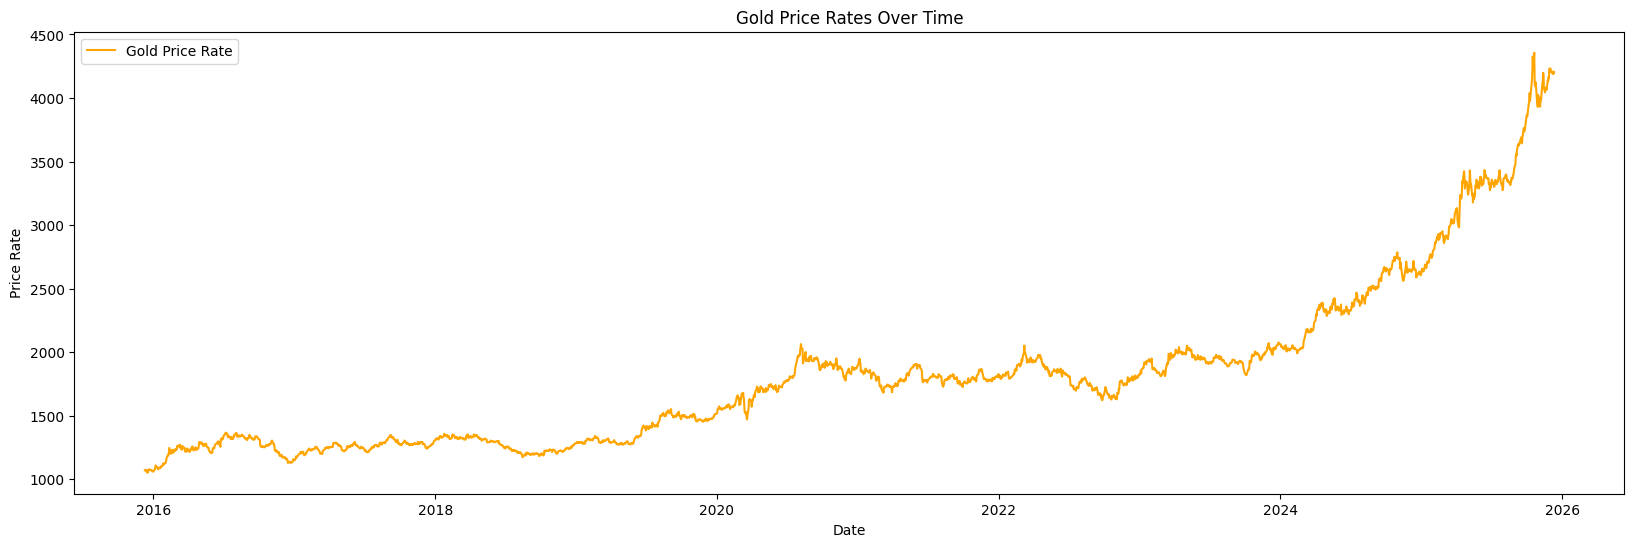

In [16]:
plt.figure(figsize=(20,6))
plt.plot(df['Date'],df['Price'],label='Gold Price Rate',color='orange')
plt.title('Gold Price Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Price Rate')
plt.legend()
plt.show()


In [24]:
df['diff'] = df['Price'].diff()

In [25]:
from statsmodels.graphics.tsaplots import plot_acf

In [26]:
df["diff"].iloc[0] = 0

C:\Users\acer\AppData\Local\Temp\ipykernel_16928\4115099631.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["diff"].iloc[0] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_16928\4115099631.py:1: SettingWithCopyWarning: 
A value is tryi

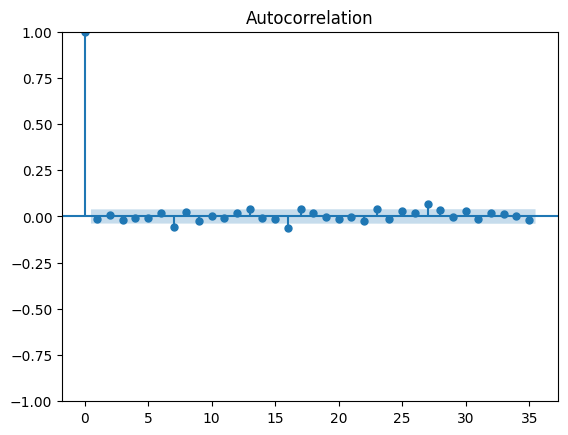

In [27]:
import matplotlib.pyplot as plt
plot_acf(df["diff"])
plt.show()